<a href="https://colab.research.google.com/github/mawady/cv-recipes/blob/main/ObjectSegmentationInstance_Infer_MaskRCNN_COCO_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Info
- Developed by Dr. Mohamed Elawady - [[Website](https://mawady.github.io)] - [[Linkedin](https://www.linkedin.com/in/mawady/)]

---

In [ ]:
# refs
# https://github.com/pytorch/vision/blob/main/torchvision/models/detection/mask_rcnn.py
# https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#instance-segmentation-models
# https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection

In [3]:
!wget https://upload.wikimedia.org/wikipedia/commons/b/ba/Broad_Street%2C_Reading.jpg -O input.jpg

--2024-02-28 18:33:56--  https://upload.wikimedia.org/wikipedia/commons/b/ba/Broad_Street%2C_Reading.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94156 (92K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  91.95K  --.-KB/s    in 0.05s   

2024-02-28 18:33:57 (1.85 MB/s) - ‘input.jpg’ saved [94156/94156]



In [4]:
from torchvision.io.image import read_image
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import draw_segmentation_masks


weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

img = read_image("input.jpg")
preprocess = weights.transforms()
batch = [preprocess(img)]

model = maskrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()
output = model(batch)[0]

score_threshold = .75
proba_threshold = 0.5

boolean_mask = output['masks'][output['scores'] > score_threshold] > proba_threshold
im = draw_segmentation_masks(img, boolean_mask.squeeze(1))
im = to_pil_image(im)

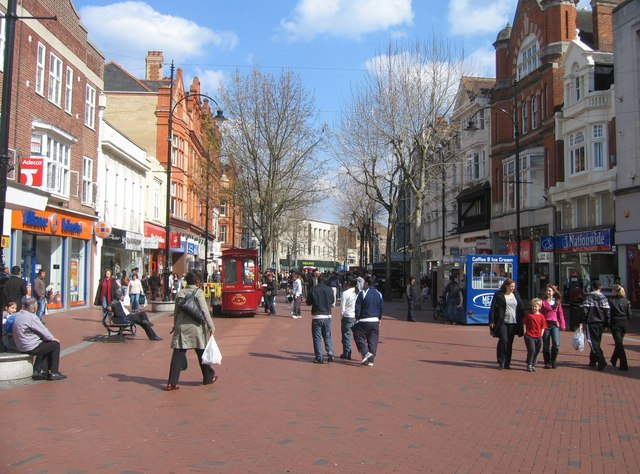

In [5]:
to_pil_image(img)

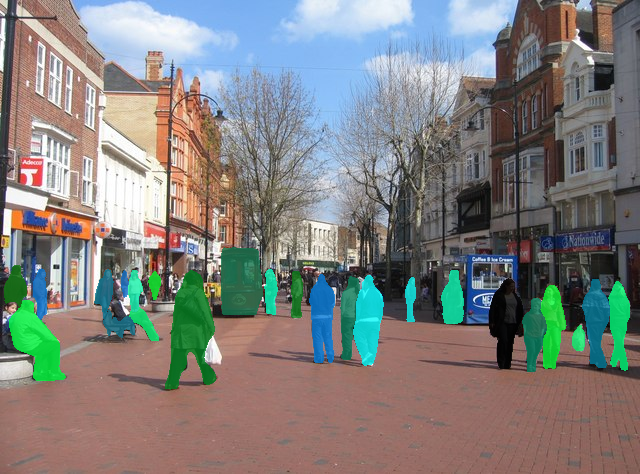

In [6]:
im